In [31]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [32]:
url = 'Data/weather.csv'
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [33]:
df['datetime'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [34]:
df = df.set_index('datetime')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [35]:
df = df.drop(columns = 'date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [36]:
to_drop = ['cloud_cover', 'sunshine', 'global_radiation', 'pressure']
df = df.drop(columns = to_drop)
df.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
1979-01-01,2.3,-4.1,-7.5,0.4,9.0
1979-01-02,1.6,-2.6,-7.5,0.0,8.0
1979-01-03,1.3,-2.8,-7.2,0.0,4.0
1979-01-04,-0.3,-2.6,-6.5,0.0,2.0
1979-01-05,5.6,-0.8,-1.4,0.0,1.0


In [37]:
df = df.loc['2000':'2020']
df

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [39]:
df.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [42]:
df = df.interpolate(column = ['max_temp', 'mean_temp', 'min_temp', 'precipitation'])

In [43]:
df.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

## Question 1

In [44]:
df_1 = df['2000':'2010'].asfreq('M')
df_1

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-01-31,10.7,11.50,10.30,0.0,0.0
2000-02-29,9.3,7.80,5.50,5.6,0.0
2000-03-31,11.8,7.50,5.00,0.0,0.0
2000-04-30,16.6,11.60,6.50,0.0,0.0
2000-05-31,16.8,12.60,6.30,1.4,0.0
...,...,...,...,...,...
2010-08-31,21.2,14.85,9.25,0.0,0.0
2010-09-30,16.6,11.70,6.90,1.8,0.0
2010-10-31,14.1,10.90,9.30,3.4,0.0


In [45]:
max_precip = df_1['precipitation'].idxmax()
max_precip

Timestamp('2002-04-30 00:00:00', freq='M')

In [46]:
df_1.loc[max_precip]

max_temp         15.3
mean_temp        10.1
min_temp          8.2
precipitation    13.8
snow_depth        0.0
Name: 2002-04-30 00:00:00, dtype: float64

In [50]:
months_locator = mdates.MonthLocator(interval=3)
years_locator = mdates.YearLocator()
year_formatter = mdates.DateFormatter("%Y")

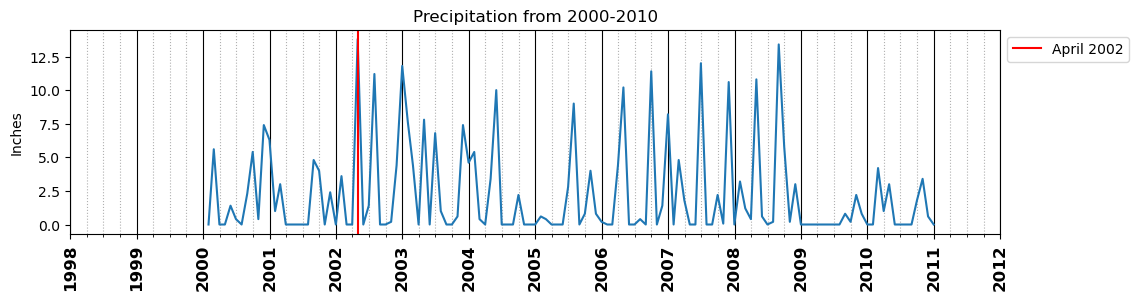

In [51]:
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(df_1['precipitation'].index, df_1['precipitation'].values,)

ax.set_title('Precipitation from 2000-2010')

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )

ax.set_ylabel('Inches')
ax.xaxis.set_minor_locator(months_locator)
ax.xaxis.set_major_locator(years_locator)
ax.xaxis.set_major_formatter(year_formatter)

ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

fig.autofmt_xdate(rotation=90, ha='center')

plt.axvline(x = max_precip, color = 'r', label = 'April 2002')

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left');

April 2002 had the most precipitation between 2000 and 2010.

## Question 2

In [52]:
df_2 = df.asfreq('Y')
df_2

,max_temp,mean_temp,min_temp,precipitation,snow_depth
datetime,,,,,
2000-12-31,11.1,2.8,-4.60,6.3,0.0
2001-12-31,3.8,1.0,-1.90,0.0,0.0
2002-12-31,12.9,7.3,4.70,11.8,0.0
2003-12-31,8.0,3.3,0.90,4.6,0.0
2004-12-31,12.6,10.6,8.50,0.0,0.0
2005-12-31,8.8,5.4,1.90,0.2,0.0
2006-12-31,11.4,8.7,5.95,8.2,0.0
2007-12-31,8.5,6.7,4.90,0.0,0.0
2008-12-31,1.5,-0.8,-3.00,0.0,0.0


In [53]:
cool_avg_temp = df_2['mean_temp'].idxmin()
cool_avg_temp

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [54]:
df_2.loc[cool_avg_temp]

max_temp         1.5
mean_temp       -0.8
min_temp        -3.0
precipitation    0.0
snow_depth       0.0
Name: 2008-12-31 00:00:00, dtype: float64

In [55]:
five_year_locator = mdates.YearLocator(5)

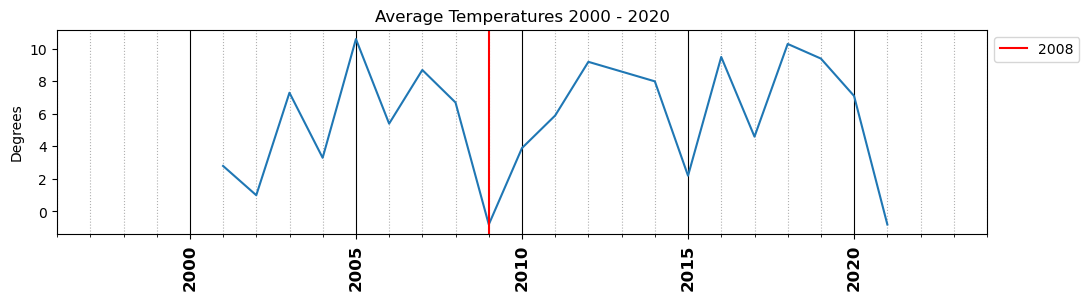

In [58]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(df_2['mean_temp'].index,df_2['mean_temp'].values,)

ax.set_title('Average Temperatures 2000 - 2020')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )

ax.set_ylabel('Degrees')

ax.xaxis.set_minor_locator(years_locator)
ax.xaxis.set_major_locator(five_year_locator)
ax.xaxis.set_major_formatter(year_formatter)

ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

fig.autofmt_xdate(rotation=90,ha='center')

plt.axvline(x = cool_avg_temp, color = 'r', label = '2008')

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left');

2008 had the coolest average temperature between 2000 and 2010.